In [2]:
import pandas as pd

#read csv file
pumpkins = pd.read_csv("US-pumpkins.csv") 

#filter out unwanted rows
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
70,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
71,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
72,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
73,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,17.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
74,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/8/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [3]:
#empty cells
pumpkins.isnull().sum()

City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

In [4]:
#defines colums to keep and drops the rest
new_columns =['Package', 'Month','Low Price','High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

In [6]:
#calculate average,get month from date and create new dataframe 
price = (pumpkins['Low Price']+ pumpkins['High Price']) / 2
month = pd.DatetimeIndex(pumpkins['Date']).month
new_pumpkins = pd.DataFrame({'Month': month,'Package': pumpkins['Package'],'Low Price': pumpkins['Low Price'], 'High Price': pumpkins['High Price'] })
print(new_pumpkins)


      Month               Package  Low Price  High Price
70        9  1 1/9 bushel cartons      15.00        15.0
71        9  1 1/9 bushel cartons      18.00        18.0
72       10  1 1/9 bushel cartons      18.00        18.0
73       10  1 1/9 bushel cartons      17.00        17.0
74       10  1 1/9 bushel cartons      15.00        15.0
...     ...                   ...        ...         ...
1738      9    1/2 bushel cartons      15.00        15.0
1739      9    1/2 bushel cartons      13.75        15.0
1740      9    1/2 bushel cartons      10.75        15.0
1741      9    1/2 bushel cartons      12.00        12.0
1742      9    1/2 bushel cartons      12.00        12.0

[415 rows x 4 columns]


In [11]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price']=price/(1+1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/2'), 'Price']=price/(1+1/2)
print(new_pumpkins.head())
print(new_pumpkins.tail())

    Month               Package  Low Price  High Price  Price
70      9  1 1/9 bushel cartons       15.0        15.0   13.5
71      9  1 1/9 bushel cartons       18.0        18.0   16.2
72     10  1 1/9 bushel cartons       18.0        18.0   16.2
73     10  1 1/9 bushel cartons       17.0        17.0   15.3
74     10  1 1/9 bushel cartons       15.0        15.0   13.5
      Month             Package  Low Price  High Price  Price
1738      9  1/2 bushel cartons      15.00        15.0    NaN
1739      9  1/2 bushel cartons      13.75        15.0    NaN
1740      9  1/2 bushel cartons      10.75        15.0    NaN
1741      9  1/2 bushel cartons      12.00        12.0    NaN
1742      9  1/2 bushel cartons      12.00        12.0    NaN


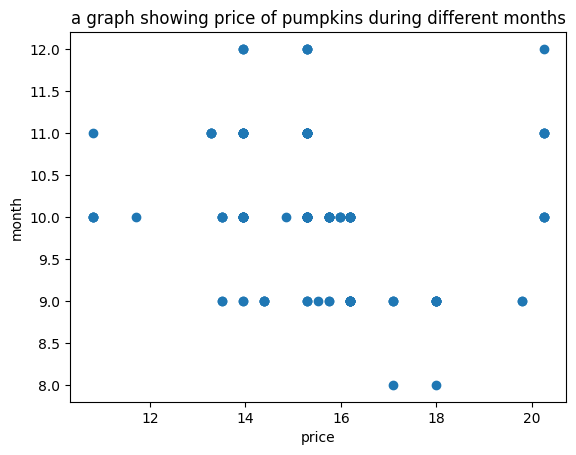

In [14]:
import matplotlib.pyplot as plt

#get values to plot
price = new_pumpkins.Price
month = new_pumpkins.Month

#create a scatter
plt.scatter(price, month)
plt.xlabel("price")
plt.ylabel("month")
plt.title("a graph showing price of pumpkins during different months")
plt.show()

Text(0, 0.5, 'Pumpkin price')

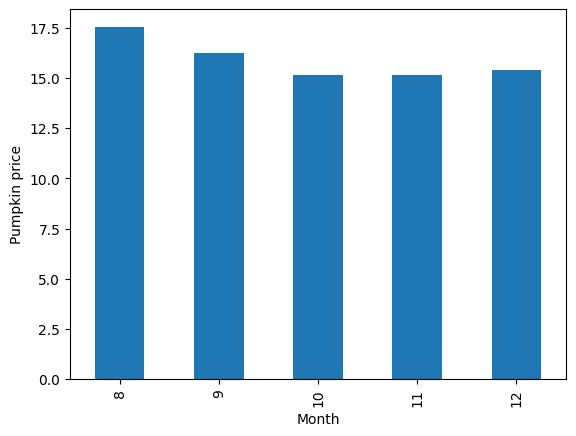

In [15]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel('Pumpkin price')